Importing Libraries

In [1]:
import tensorflow 
from tensorflow.keras import datasets,layers,models
from matplotlib import pyplot as plt
import numpy as np

Load the Dataset

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

Here we see there are 50000 training images 

In [4]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

Here we see there are 10000 testing images

In [5]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

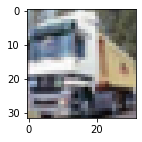

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array ,for our classification having 1D array is good enough.so we will convert this to now 1D array

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Let's plot some images

In [10]:
def plot_sample (X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

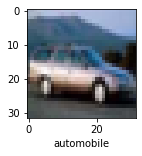

In [11]:
plot_sample(X_train,y_train,4)

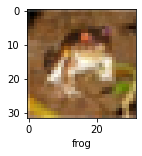

In [12]:
plot_sample(X_train,y_train,0)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

Build Simple Artificial Neural Nework for image Classification

In [15]:
model= Sequential()

In [16]:
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.8947 - accuracy: 0.3280
Epoch 2/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.6582 - accuracy: 0.4046
Epoch 3/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5771 - accuracy: 0.4347
Epoch 4/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5234 - accuracy: 0.4558
Epoch 5/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4850 - accuracy: 0.4686


In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5490 - accuracy: 0.4574


[1.5489672422409058, 0.45739999413490295]

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(X_test)
y_pred_classes_ann=[np.argmax(element)for element in y_pred]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_ann))

313/313 [==============================] - 3s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      1000
           1       0.63      0.52      0.57      1000
           2       0.33      0.30      0.32      1000
           3       0.28      0.39      0.33      1000
           4       0.40      0.40      0.40      1000
           5       0.44      0.28      0.34      1000
           6       0.38      0.66      0.49      1000
           7       0.55      0.50      0.52      1000
           8       0.67      0.49      0.56      1000
           9       0.53      0.51      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



Now let us build a convolutional neural network to train images

In [20]:
from keras.layers import Conv2D,MaxPool2D

In [21]:
cnn=Sequential()

cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPool2D())
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPool2D())
cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(MaxPool2D())
cnn.add(Flatten())

cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))



In [22]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [23]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5455 - accuracy: 0.4374
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1535 - accuracy: 0.5953
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9996 - accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8984 - accuracy: 0.6866
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8244 - accuracy: 0.7154
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7581 - accuracy: 0.7360
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7000 - accuracy: 0.7575
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6526 - accuracy: 0.7735
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6091 - accuracy: 0.7873
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.8843 - accuracy: 0.7102


[0.884265124797821, 0.7102000117301941]

In [25]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[2.50815693e-03, 5.01645263e-04, 1.84509612e-03, 8.32708359e-01,
        2.92820769e-04, 1.18980341e-01, 3.80397364e-02, 1.66600192e-04,
        4.78286762e-03, 1.74386165e-04],
       [9.14217846e-04, 1.86676681e-01, 2.01998118e-05, 7.50256049e-06,
        1.26363566e-05, 5.46030651e-06, 1.10735615e-04, 1.67883343e-07,
        8.02331150e-01, 9.92118102e-03],
       [7.00360760e-02, 5.02782762e-01, 3.31500382e-03, 8.87113996e-03,
        1.11740315e-03, 4.36733989e-03, 2.50783749e-03, 1.02267135e-02,
        3.55742306e-01, 4.10333499e-02],
       [4.13773656e-01, 2.61702985e-01, 5.98888705e-03, 4.42970637e-03,
        1.59452227e-03, 2.80442619e-04, 1.29778229e-03, 3.60778649e-04,
        3.10100168e-01, 4.71106003e-04],
       [2.94157303e-06, 7.28405439e-06, 3.92997218e-03, 2.49416213e-02,
        1.10637881e-01, 1.58634549e-03, 8.58810604e-01, 1.02826507e-05,
        7.09513697e-05, 2.09395171e-06]], dtype=float32)

In [27]:
y_classes= [np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

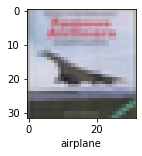

In [42]:
plot_sample(X_test,y_test,3)

In [43]:
classes[y_classes[3]]

'airplane'

In [44]:
print('Classification Report:\n',classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      1000
           1       0.88      0.80      0.84      1000
           2       0.67      0.52      0.58      1000
           3       0.49      0.61      0.54      1000
           4       0.63      0.68      0.66      1000
           5       0.61      0.62      0.62      1000
           6       0.78      0.78      0.78      1000
           7       0.75      0.74      0.75      1000
           8       0.85      0.81      0.83      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

